<a href="https://colab.research.google.com/github/richarddushime/exercise/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# Sample Cherry Tree Data
diameter = np.array([8.3, 8.6, 8.8, 10.5, 10.7, 10.8, 11.0, 11.0, 11.1, 11.2,
                     20.6, 11.3, 11.4, 11.4, 11.7, 12.0, 12.9, 12.9, 13.3, 13.7,
                     13.8, 14.0, 14.2, 14.5, 16.0, 16.3, 17.3, 17.5, 17.9, 18.0, 18.0])

volume = np.array([10.3, 10.3, 10.2, 16.4, 18.8, 19.7, 15.6, 18.2, 22.6, 19.9,
                   77.0, 24.2, 21.0, 21.4, 21.3, 19.1, 22.2, 33.8, 27.4, 25.7,
                   24.9, 34.5, 31.7, 36.3, 38.3, 42.6, 55.4, 55.7, 58.3, 51.5, 51.0])


In [4]:
# Convert data to DataFrame
df = pd.DataFrame({'Diameter': diameter, 'Volume': volume})
df.head()

,Diameter,Volume
0,8.3,10.3
1,8.6,10.3
2,8.8,10.2
3,10.5,16.4
4,10.7,18.8


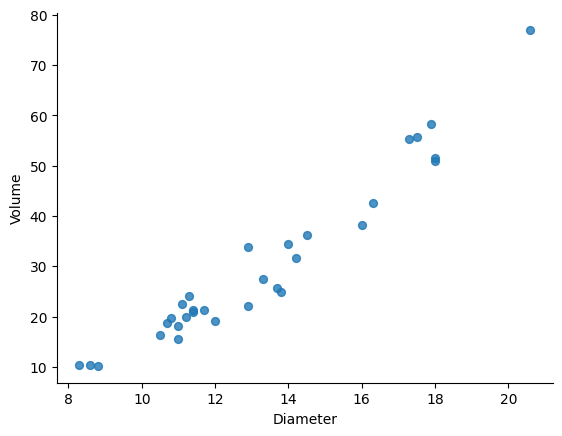

In [6]:
#Diameter vs Volume
df.plot(kind='scatter', x='Diameter', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(diameter.reshape(-1, 1))

In [14]:
# Train model
model = LinearRegression()
model.fit(X_poly, volume)


LinearRegression()

In [16]:
# Predictions
diameter_range = np.linspace(min(diameter), max(diameter), 100).reshape(-1, 1)
volume_pred = model.predict(poly.transform(diameter_range))

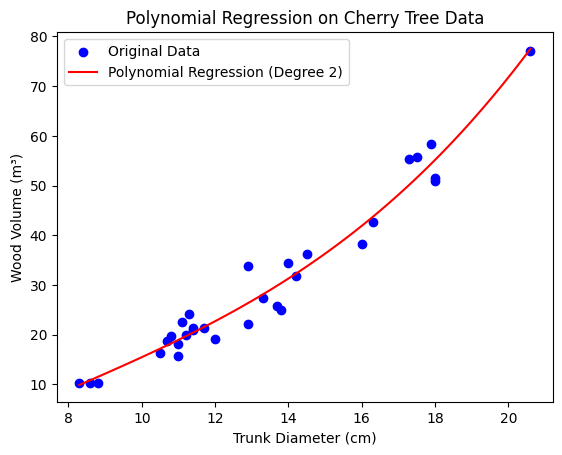

In [17]:
# Plot results
plt.scatter(diameter, volume, color='blue', label="Original Data")
plt.plot(diameter_range, volume_pred, color='red', label="Polynomial Regression (Degree 2)")
plt.xlabel("Trunk Diameter (cm)")
plt.ylabel("Wood Volume (m³)")
plt.legend()
plt.title("Polynomial Regression on Cherry Tree Data")
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Sample Dataset: Speed vs. Stopping Distance
speed = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # Speed in km/h
distance = np.array([4, 8, 16, 24, 45, 56, 77, 102, 132, 166])  # Stopping distance in meters

In [23]:
# Convert data to DataFrame
df = pd.DataFrame({'Speed': speed, 'Stopping Distance': distance})
df.head()

,Speed,Stopping Distance
0,10,4
1,20,8
2,30,16
3,40,24
4,50,45


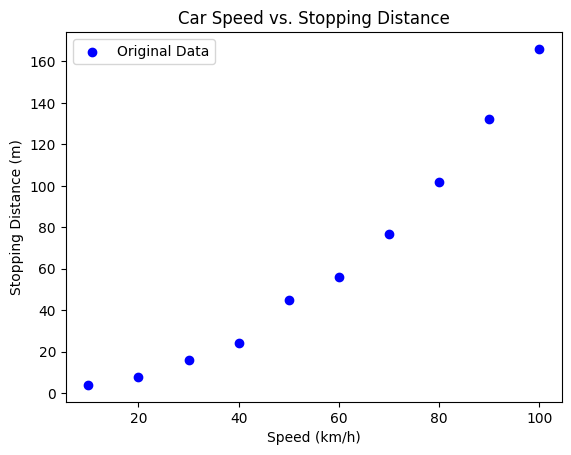

In [25]:
# Visualize the data
plt.scatter(speed, distance, color='blue', label="Original Data")
plt.xlabel("Speed (km/h)")
plt.ylabel("Stopping Distance (m)")
plt.title("Car Speed vs. Stopping Distance")
plt.legend()
plt.show()

In [28]:
# Polynomial Regression (Degree = 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(speed.reshape(-1, 1))

In [29]:
# Train model
model = LinearRegression()
model.fit(X_poly, distance)


LinearRegression()

In [30]:
# Predictions
speed_range = np.linspace(min(speed), max(speed), 100).reshape(-1, 1)
distance_pred = model.predict(poly.transform(speed_range))


In [31]:
# Evaluate model performance
mse = mean_squared_error(distance, model.predict(X_poly))
r2 = r2_score(distance, model.predict(X_poly))
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.35
R² Score: 1.00


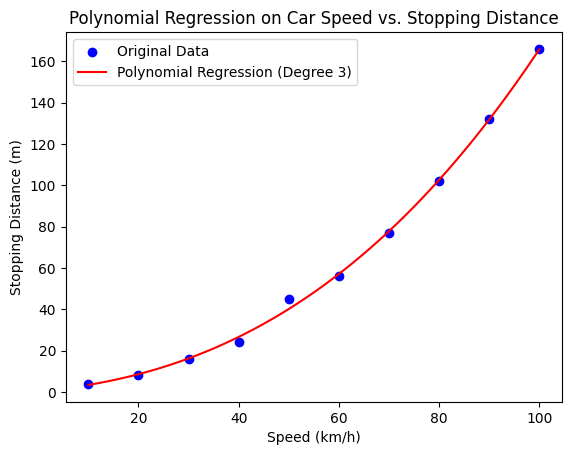

In [33]:

# Plot results
plt.scatter(speed, distance, color='blue', label="Original Data")
plt.plot(speed_range, distance_pred, color='red', label="Polynomial Regression (Degree 3)")
plt.xlabel("Speed (km/h)")
plt.ylabel("Stopping Distance (m)")
plt.legend()
plt.title("Polynomial Regression on Car Speed vs. Stopping Distance")
plt.show()

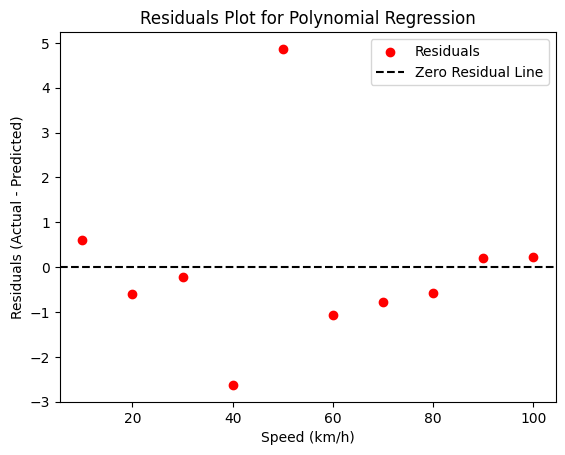

In [34]:
# Residuals Calculation
predicted_distance = model.predict(X_poly)
residuals = distance - predicted_distance

# Plot Residuals
plt.scatter(speed, residuals, color='red', marker='o', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--', label="Zero Residual Line")
plt.xlabel("Speed (km/h)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot for Polynomial Regression")
plt.legend()
plt.show()